In [20]:
#Importing Libraries
import numpy as np
from matplotlib import pyplot as plt

In [21]:
#Importing Linear Algebra Libraries
import scipy.sparse as sp
import scipy.sparse.linalg
import scipy.linalg

In [22]:
#Defining our boundary conditions and problem parameters
a = 0.
b = 1.
mu = 1.
beta = np.array([1, 10, 100, 200])
y_a = 0
y_b = 1

In [23]:
#Finite Discretization
dx = 0.005
n =  int((b-a)/dx)
x = np.linspace(a,b,n+1)

In [24]:
#Defining a function of zeros
def f(x):
    return 0+0*x

In [25]:
#Defining our exact solution
def y(x,mu,beta):
    return (np.exp(beta*x/mu)-1)/(np.exp(beta/mu)-1)

In [26]:
#Defining our matrix-vector product
def solver_centred(x,f,mu,beta,y_a,y_b,dx,n):
  #Defining b vector
  b = f(x)
  #Defining our matrix
  Ad =-(mu/dx**2)*sp.diags([1., -2., 1.], [-1, 0, 1], shape=[n+1, n+1], format = 'csr')
  Ac =beta/(2*dx)*sp.diags([-1., 0., 1.], [-1, 0, 1], shape=[n+1, n+1], format = 'csr')
  A = Ad + Ac
  #Modifying our tridiagonal matrix to include boundary conditions
  A[0,1] = 0
  A[0, 1] = 0.
  A[-1, -2] = 0.
  A[0, 0] = 1./dx**2
  A[-1, -1] = 1./dx**2
  #Modifying our b vector to include boundary conditions
  b[0] = y_a/dx**2
  b[-1] = y_b/dx**2
  #solving our linear system
  u = sp.linalg.spsolve(A,b)
  return u

In [27]:
#Grabbing our solutions (exact and numerical)
u_ex_beta1 = y(x,mu,beta[0])
u_center_beta1 = solver_centred(x,f,mu,beta[0],y_a,y_b,dx,n)

u_ex_beta10 = y(x,mu,beta[1])
u_center_beta10 = solver_centred(x,f,mu,beta[1],y_a,y_b,dx,n)

u_ex_beta100 = y(x,mu,beta[2])
u_center_beta100 = solver_centred(x,f,mu,beta[2],y_a,y_b,dx,n)

u_ex_beta1000 = y(x,mu,beta[3])
u_center_beta1000 = solver_centred(x,f,mu,beta[3],y_a,y_b,dx,n)

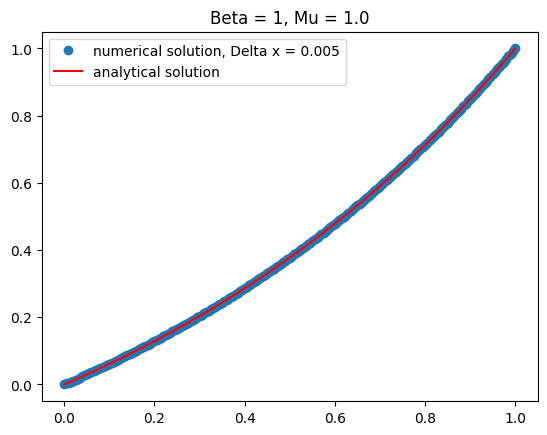

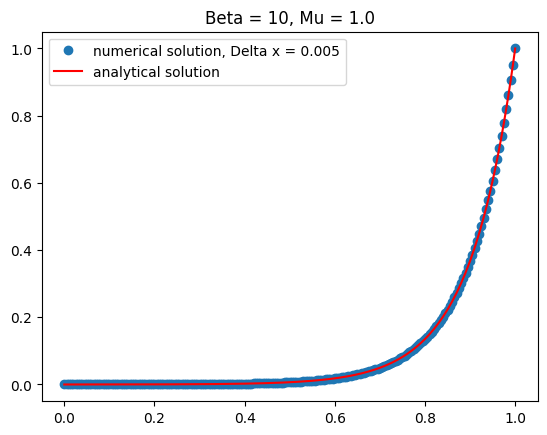

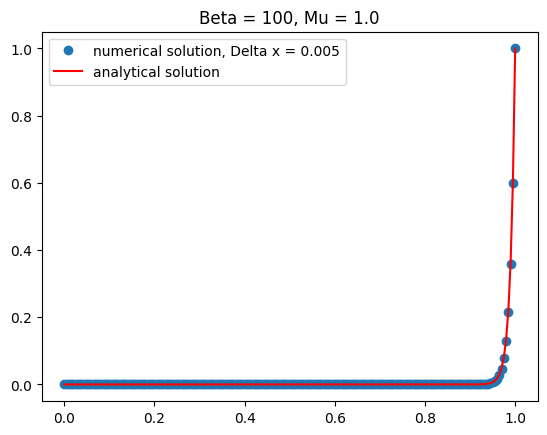

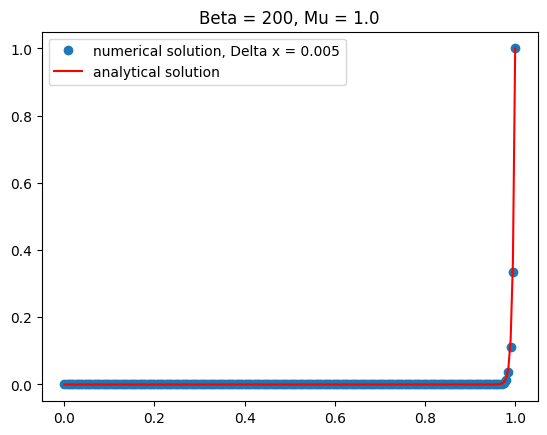

In [39]:
#Plotting solutions

plt.plot(x,u_center_beta1,'o', label = f'numerical solution, Delta x = {dx}')
plt.plot(x,u_ex_beta1,'r', label = 'analytical solution')
plt.title(f'Beta = {beta[0]}, Mu = {mu}')
plt.legend()
plt.show()

plt.plot(x,u_center_beta10,'o', label = f'numerical solution, Delta x = {dx}')
plt.plot(x,u_ex_beta10,'r', label = 'analytical solution')
plt.title(f'Beta = {beta[1]}, Mu = {mu}')
plt.legend()
plt.show()

plt.plot(x,u_center_beta100,'o', label = f'numerical solution, Delta x = {dx}')
plt.plot(x,u_ex_beta100,'r', label = 'analytical solution')
plt.title(f'Beta = {beta[2]}, Mu = {mu}')
plt.legend()
plt.show()

plt.plot(x,u_center_beta1000,'o', label = f'numerical solution, Delta x = {dx}')
plt.plot(x,u_ex_beta1000,'r', label = 'analytical solution')
plt.title(f'Beta = {beta[3]}, Mu = {mu}')
plt.legend()
plt.show()